<a href="https://colab.research.google.com/github/theadarshkr/Feynn-Labs-Assignment/blob/main/Adarsh_Kumar_T_1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
pip install kneed

In [156]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kneed import KneeLocator


In [137]:
#Loading EV data
df1 = pd.read_excel('EVData(India)_Collected(Web)_18MI31001.xlsx')

In [138]:
#Loading Charging Station data
df2 = pd.read_csv('electric_vehicle_charging_station_list.csv')

**Eploring the Dataset-1**

In [139]:
df1.head()

,Name,Price(INR),Range (km),Charging Time at Home(hr),Top Speed (kmph),Battery Capacity(kwh),Vehicle Type
0,Revolt RV400,126000,150,4.5,85,3.24,Bike
1,Ultraviolette F77,380000,307,4.0,140,10.30,Bike
2,Oben Rorr,149000,200,2.0,100,4.40,Bike
3,Tork Kratos R,167000,180,6.0,70,4.00,Bike
4,Komaki Ranger,185000,250,6.0,75,3.24,Bike


In [140]:
df1.describe()

,Price(INR),Range (km),Charging Time at Home(hr),Top Speed (kmph),Battery Capacity(kwh)
count,1.140000e+02,114.000000,114.000000,114.000000,114.000000
mean,3.249735e+06,238.096491,6.047105,103.052632,24.184035
std,8.703218e+06,183.635700,2.632397,64.587163,36.115533
min,2.500000e+04,50.000000,1.000000,24.000000,0.580000
25%,1.010000e+05,110.000000,4.000000,57.000000,2.222500
50%,1.450000e+05,150.000000,6.000000,87.500000,3.955000
75%,1.417750e+06,393.500000,7.875000,140.000000,34.400000
max,7.500000e+07,857.000000,15.000000,260.000000,114.000000


In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       114 non-null    object 
 1   Price(INR)                 114 non-null    int64  
 2   Range (km)                 114 non-null    int64  
 3   Charging Time at Home(hr)  114 non-null    float64
 4   Top Speed (kmph)           114 non-null    int64  
 5   Battery Capacity(kwh)      114 non-null    float64
 6   Vehicle Type               114 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.4+ KB


<ipython-input-143-27284c1ca874>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



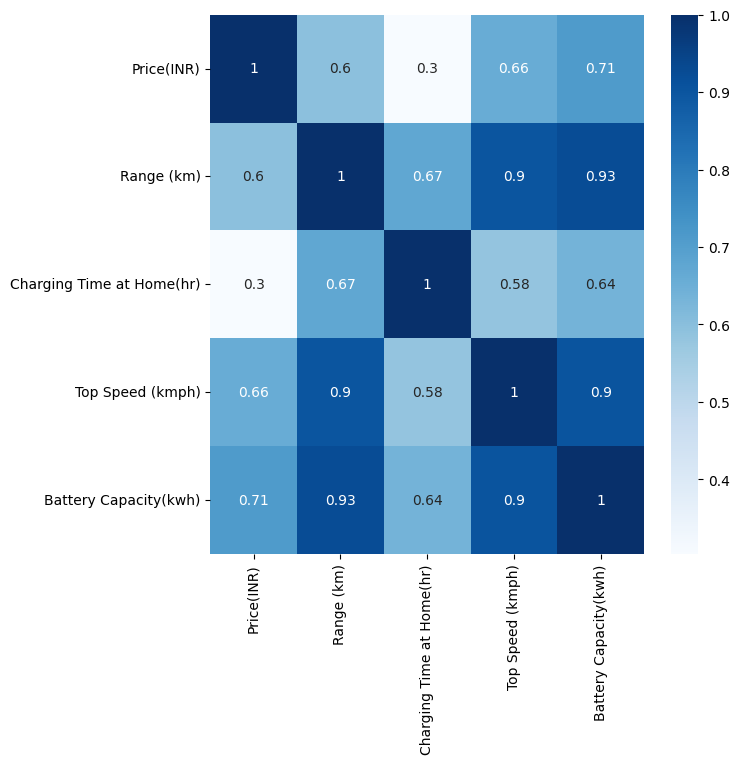

In [143]:
plt.figure(figsize=(7,7))
sns.heatmap(df1.corr(), annot=True, cmap='Blues')
plt.show()

In [144]:
#Dropping the 'Name' column as it's not needed for clustering
df1 = df1.drop('Name', axis=1)

#Separating numerical and categorical features
numerical_features = df1.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Vehicle Type']

#Creating transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

#Combining transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

The optimal number of clusters is 2


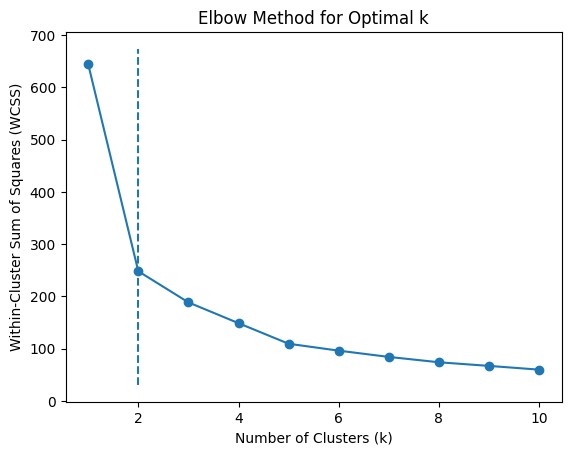

In [155]:
#Choosing a range of clusters and calculate the within-cluster sum of squares (WCSS)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', kmeans)])
    pipeline.fit(df1)
    wcss.append(pipeline.named_steps['kmeans'].inertia_)

#Finding the optimal k value
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = kn.knee

#Printing the optimal k value
print(f'The optimal number of clusters is {optimal_k}')

#Plotting the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], linestyles="dashed")
plt.show()

In [148]:
#Using the optimal k for K-Means clustering
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', optimal_kmeans)])
df1['Cluster'] = pipeline.fit_predict(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



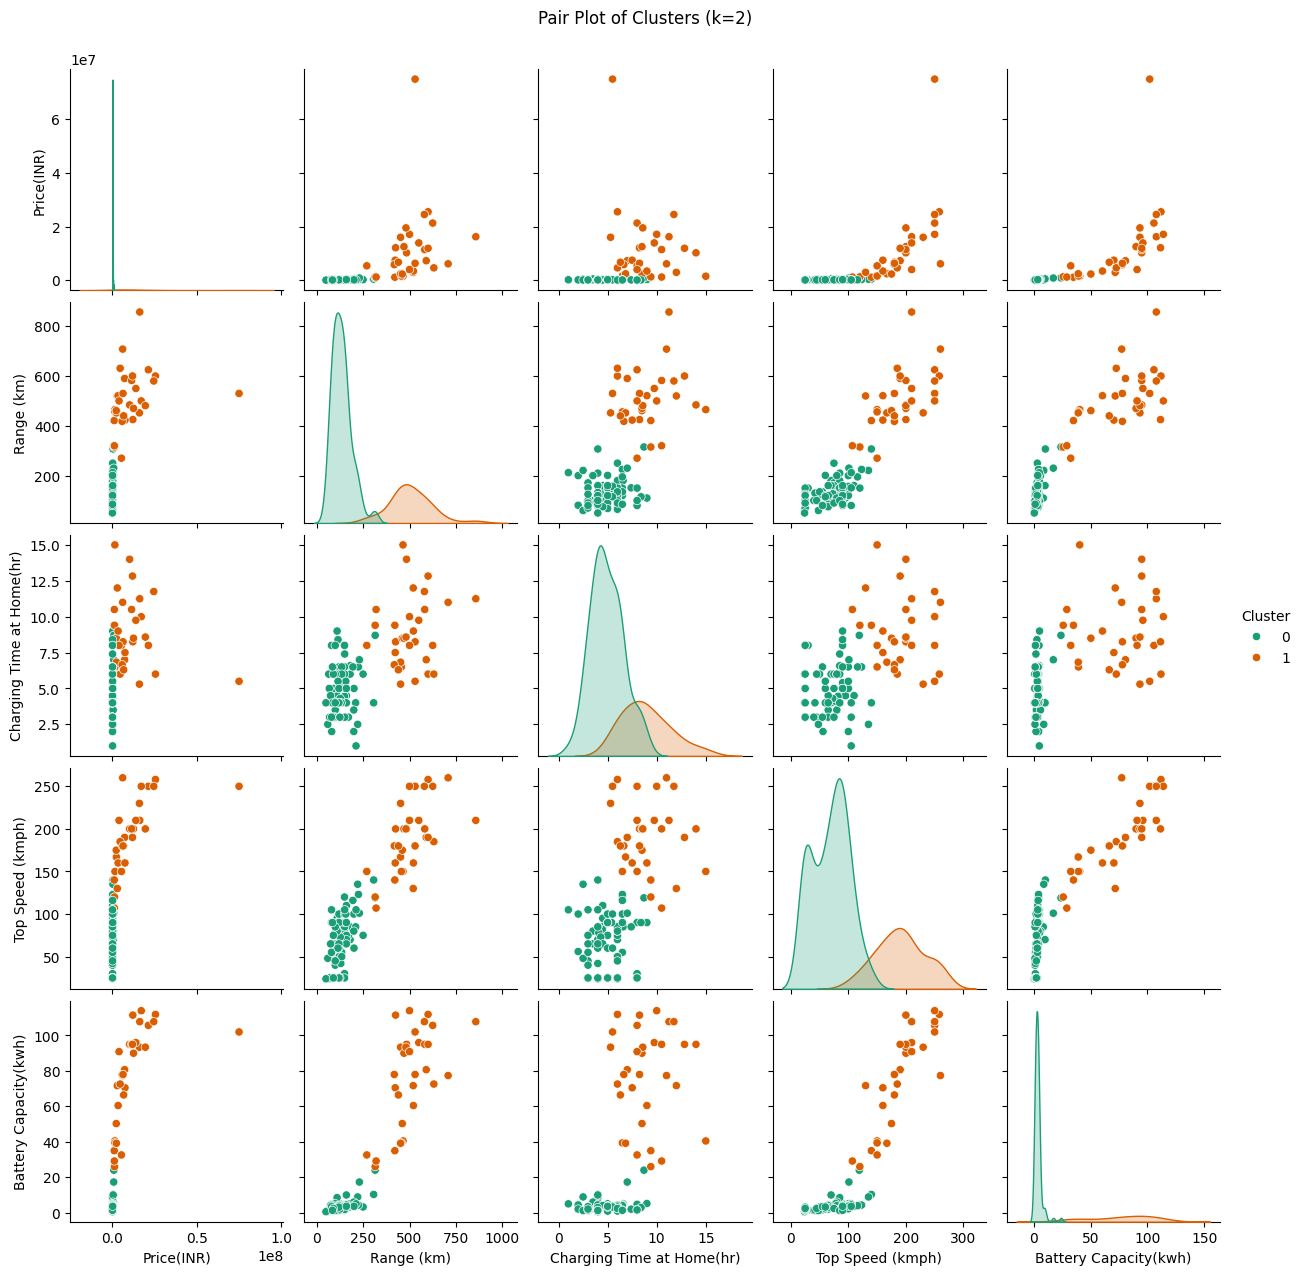

In [149]:
#Visualizing the clusters - pair plot
sns.pairplot(df1, hue='Cluster', diag_kind='kde', palette='Dark2')
plt.suptitle(f'Pair Plot of Clusters (k={optimal_k})', y=1.02)
plt.show()

In [150]:
#Average values per cluster
cluster_avg = df1.groupby('Cluster').mean()
print(cluster_avg)

           Price(INR)  Range (km)  Charging Time at Home(hr)  \
Cluster                                                        
0        1.510711e+05  133.731707                   4.918659   
1        1.119006e+07  505.531250                   8.938750   

         Top Speed (kmph)  Battery Capacity(kwh)  
Cluster                                           
0                68.97561               3.653415  
1               190.37500              76.793750  


<ipython-input-150-c55015828e4b>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**Exploring Dataset-2**

In [79]:
df2.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [80]:
df2.describe()

,no,latitude,longitude
count,202.000000,202.000000,202.000000
mean,101.500000,25.960987,78.418002
std,58.456537,5.616108,3.097664
min,1.000000,8.481051,76.277781
25%,51.250000,28.535516,77.212996
50%,101.500000,28.580286,77.226252
75%,151.750000,28.617783,77.375216
max,202.000000,28.642892,88.509064


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB


In [82]:
pip install haversine

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

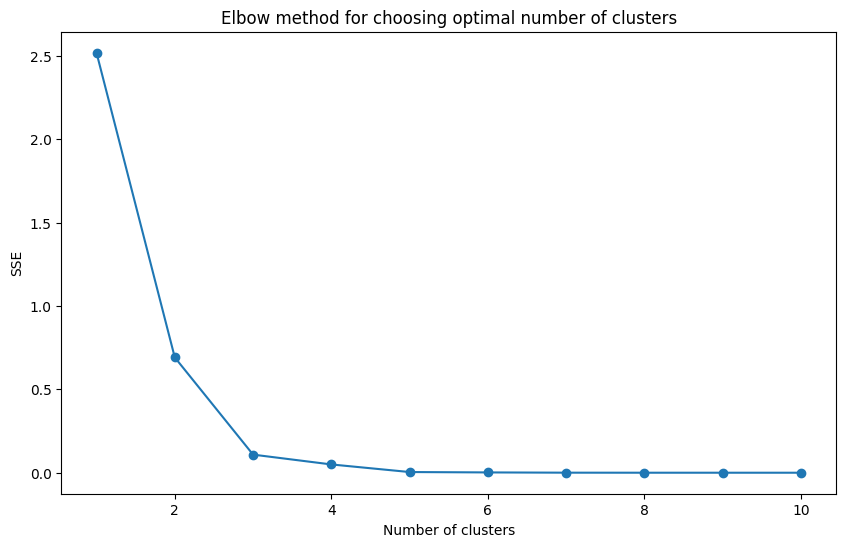

In [157]:
#To calculate the distance between two points on the earth's surface
from haversine import haversine

#Converting the latitude and longitude columns to radians
df2["lat_rad"] = np.radians(df2["latitude"])
df2["lon_rad"] = np.radians(df2["longitude"])

#Defining the distance function using haversine
def dist_func(x, y):
    return haversine((x[0], x[1]), (y[0], y[1]))

#Creating an empty list to store the SSE values for different numbers of clusters
sse = []

#Looping over a range of possible numbers of clusters from 1 to 10
for k in range(1, 11):
    #Creating a K-means model with k clusters
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    #Fitting the model on the data
    kmeans.fit(df2[["lat_rad", "lon_rad"]])
    #Appending the SSE value to the list
    sse.append(kmeans.inertia_)

#Plotting the SSE values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow method for choosing optimal number of clusters")
plt.show()

In [152]:
#Creating a K-means model with 3 clusters
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
#Fitting the model on the data
kmeans.fit(df2[["lat_rad", "lon_rad"]])
#Adding the cluster labels to the data
df2["cluster"] = kmeans.labels_

#Checking the number and size of clusters
df2["cluster"].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0    160
1     24
2     18
Name: cluster, dtype: int64

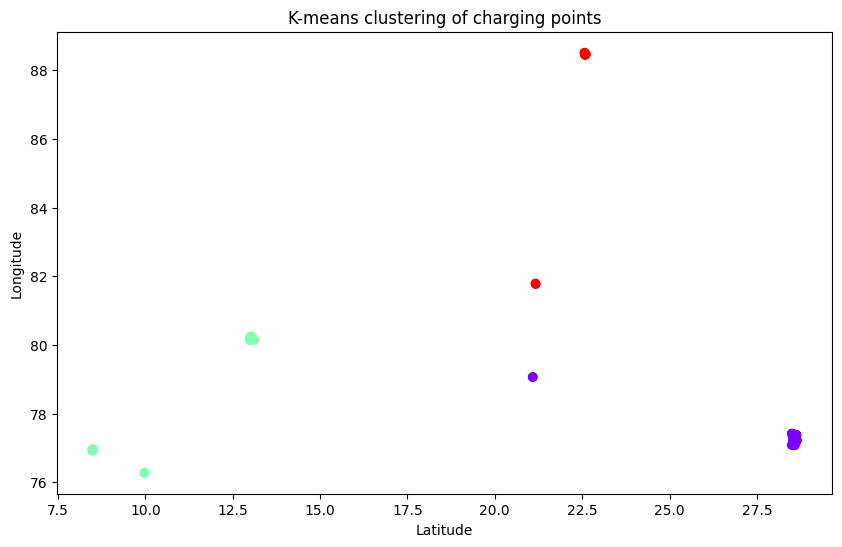

In [153]:
#Creating a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df2["latitude"], df2["longitude"], c=df2["cluster"], cmap="rainbow")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("K-means clustering of charging points")
plt.show()

But the two points in the center seem more closer than their respective cluster. Taking n_clusters=4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0    158
1     24
2     16
3      4
Name: cluster, dtype: int64


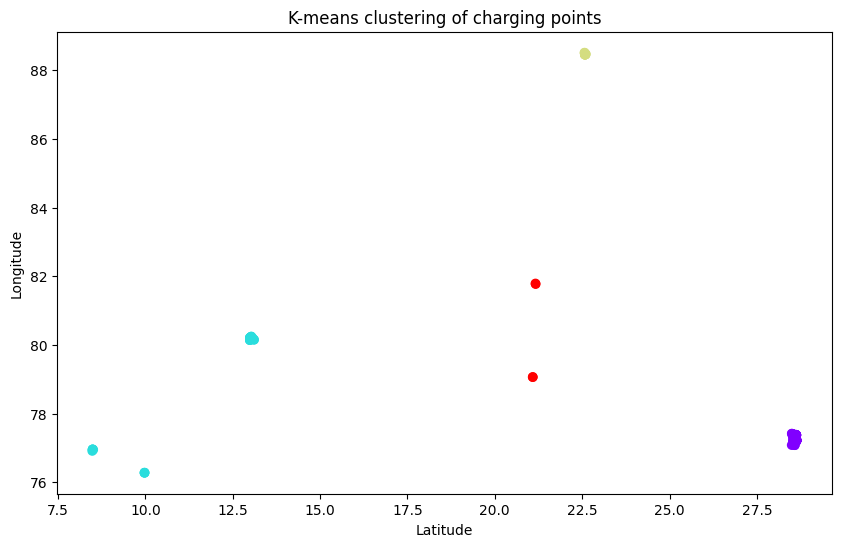

In [161]:
#Creating a K-means model with 4 clusters
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
#Fitting the model on the data
kmeans.fit(df2[["lat_rad", "lon_rad"]])
#Adding the cluster labels to the data
df2["cluster"] = kmeans.labels_

#Checking the number and size of clusters
print(df2["cluster"].value_counts())

#Creating a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df2["latitude"], df2["longitude"], c=df2["cluster"], cmap="rainbow")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("K-means clustering of charging points")
plt.show()